In [1]:
'''
【课程1.4】  统计分析

统计指标对定量数据进行统计描述，常从集中趋势和离中趋势两个方面进行分析

集中趋势度量 / 离中趋势度量

'''

'\n【课程1.4】  统计分析\n\n统计指标对定量数据进行统计描述，常从集中趋势和离中趋势两个方面进行分析\n\n集中趋势度量 / 离中趋势度量\n\n'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline


In [25]:
# 1、集中趋势度量
# 指一组数据向某一中心靠拢的倾向，核心在于寻找数据的代表值或中心值 —— 统计平均数
# 算数平均数、位置平均数
# （1）算数平均数
data = pd.DataFrame({'f':np.random.rand(100),
                    'value':np.random.randint(100,110,100)})
print(data.head())
mean = data['value'].mean()
print('算术平均数为：%2f'%mean)
mean_w = (data['value'] * data['f']).sum()/data['f'].sum()
print('加权平均数为:%2f'%mean_w)

          f  value
0  0.297621    103
1  0.904748    103
2  0.667015    104
3  0.501235    109
4  0.911315    106
算术平均数为：105.020000
加权平均数为:105.116905


众数为： [107]
中位数为：105.000000


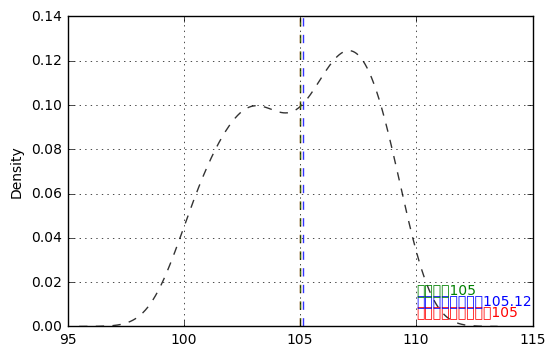

In [32]:
# 1、集中趋势度量
# （2）位置平均数
m = data['value'].mode().tolist()
print('众数为：',m)
med = data['value'].median()
print('中位数为：%2f'%med)

data['value'].plot(kind = 'kde',alpha = 0.8,style = '--k',grid = True)


plt.axvline(mean,hold=None,color='r',linestyle="--",alpha=0.8)  
plt.text(mean + 5,0.005,'简单算数平均值为：%d' % mean, color = 'r')
# 简单算数平均值

plt.axvline(mean_w,hold=None,color='b',linestyle="--",alpha=0.8)  
plt.text(mean + 5,0.01,'加权算数平均值：%.2f' % mean_w, color = 'b')
# 加权算数平均值

plt.axvline(med,hold=None,color='g',linestyle="--",alpha=0.8)  
plt.text(mean + 5,0.015,'中位数：%i' % med, color = 'g')

                A_sale      B_sale
2019-04-01  286.349081  636.653437
2019-04-02  554.106173  889.427637
2019-04-03  166.700571   91.733200
2019-04-04  878.627521  744.794114
2019-04-05  745.569575  978.736532
A的销售额极差为：938.70，B的销售额极差为：944.83
A的销售额分位差为：501.28,B的销售额分位差为：640.98


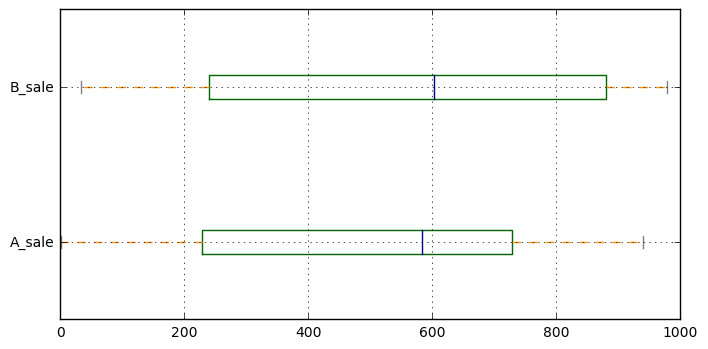

In [43]:
# 2、离中趋势度量
# 指一组数据中各数据以不同程度的距离偏离中心的趋势
# 极差与分位差、方差与标准差、离散系数

data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,
                    'B_sale':np.random.rand(30)*1000},
                   index = pd.period_range('20190401','20190430'))
print(data.head())
#极差
a_r = data['A_sale'].max() - data['A_sale'].min()
b_r = data['B_sale'].max() - data['B_sale'].min()
print('A的销售额极差为：%.2f，B的销售额极差为：%.2f'%(a_r,b_r))


sta = data['A_sale'].describe()
stb = data['B_sale'].describe()
#print(sta)
a_iqr = sta.loc['75%'] - sta.loc['25%']
b_iqr = stb.loc['75%'] - stb.loc['25%']
print('A的销售额分位差为：%.2f,B的销售额分位差为：%.2f'%(a_iqr,b_iqr))

#箱型图
color = dict(boxes = 'DarkGreen',whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False,grid = True,color = color,figsize = (8,4))

A的标准差为：292.97,B的标准差为：336.47
A的方差为：85833.68,B的方差为：113215.24


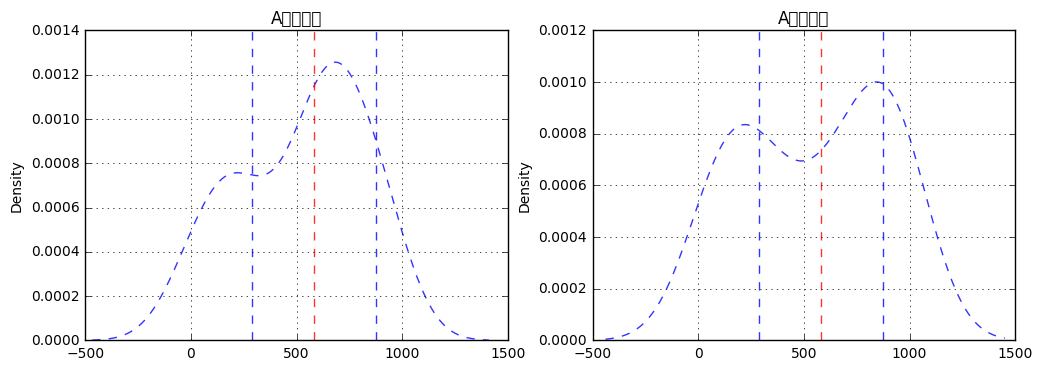

In [46]:
# 2、离中趋势度量
# （2）方差与标准差

#标准差
a_std = sta.loc['std']
b_std = stb.loc['std']
#方差
a_var = data['A_sale'].var()
b_var = data['B_sale'].var()
print('A的标准差为：%.2f,B的标准差为：%.2f'%(a_std,b_std))
print('A的方差为：%.2f,B的方差为：%.2f'%(a_var,b_var))

fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,2,1)
data['A_sale'].plot(kind = 'kde',style = '--',alpha = 0.8,grid = True,title = 'A密度曲线')
plt.axvline(sta.loc['50%'],hold= None,color = 'r',alpha = 0.8,linestyle = '--')
plt.axvline(sta.loc['50%'] - a_std,hold=None,color='b',linestyle="--",alpha=0.8)  
plt.axvline(sta.loc['50%'] + a_std,hold=None,color='b',linestyle="--",alpha=0.8)  
# A密度曲线，1个标准差

ax2 = fig.add_subplot(1,2,2)
data['B_sale'].plot(kind = 'kde',style = '--',alpha = 0.8,grid = True,title = 'B密度曲线')
plt.axvline(sta.loc['50%'],hold= None,color = 'r',alpha = 0.8,linestyle = '--')
plt.axvline(sta.loc['50%'] - a_std,hold=None,color='b',linestyle="--",alpha=0.8)  
plt.axvline(sta.loc['50%'] + a_std,hold=None,color='b',linestyle="--",alpha=0.8)